In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-02-20 15:01:02--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-02-20 15:01:02 (93.1 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
regions= dataset['region'].value_counts()
dataset.replace(regions.index, [0,1,2,3], inplace=True)
dataset.replace(['yes','no'], [0,1], inplace=True)
dataset.replace(['female','male'], [0,1], inplace=True)

In [4]:
train_dataset, test_dataset, train_labels, test_labels= train_test_split(dataset.iloc[:, :-1], dataset['expenses'], test_size=0.2, shuffle=True)

In [5]:
train_dataset.iloc[0].shape

(6,)

In [6]:
test_labels

406      4185.10
114     11488.32
162     10450.55
28       2775.19
778      5934.38
          ...   
889     11945.13
974      2322.62
157     15518.18
1172    11093.62
638     20149.32
Name: expenses, Length: 268, dtype: float64

In [38]:
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=(6,), kernel_initializer='normal', activation='relu'),
        layers.Dense(32, kernel_initializer='normal',activation='relu'),
        layers.Dense(1)
    ]
)

model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')

In [39]:
history= model.fit(train_dataset, train_labels, epochs=500, batch_size= 16, verbose=2)

Epoch 1/500
67/67 - 1s - loss: 13244.9697 - mean_absolute_error: 13244.9697 - mean_squared_error: 321477600.0000 - 1s/epoch - 17ms/step
Epoch 2/500
67/67 - 0s - loss: 12976.8076 - mean_absolute_error: 12976.8076 - mean_squared_error: 314048000.0000 - 145ms/epoch - 2ms/step
Epoch 3/500
67/67 - 0s - loss: 11910.8486 - mean_absolute_error: 11910.8486 - mean_squared_error: 285656480.0000 - 150ms/epoch - 2ms/step
Epoch 4/500
67/67 - 0s - loss: 9713.2871 - mean_absolute_error: 9713.2871 - mean_squared_error: 231367504.0000 - 144ms/epoch - 2ms/step
Epoch 5/500
67/67 - 0s - loss: 7826.1606 - mean_absolute_error: 7826.1606 - mean_squared_error: 177158992.0000 - 147ms/epoch - 2ms/step
Epoch 6/500
67/67 - 0s - loss: 7479.0811 - mean_absolute_error: 7479.0811 - mean_squared_error: 158846928.0000 - 149ms/epoch - 2ms/step
Epoch 7/500
67/67 - 0s - loss: 7447.0332 - mean_absolute_error: 7447.0332 - mean_squared_error: 157433504.0000 - 145ms/epoch - 2ms/step
Epoch 8/500
67/67 - 0s - loss: 7423.6157 - m

In [34]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - loss: 6683.5498 - mean_absolute_error: 6683.5498 - mean_squared_error: 146494784.0000 - 144ms/epoch - 16ms/step


9/9 - 0s - loss: 2224.1907 - mean_absolute_error: 2224.1907 - mean_squared_error: 26956944.0000 - 153ms/epoch - 17ms/step
Testing set Mean Abs Error: 2224.19 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


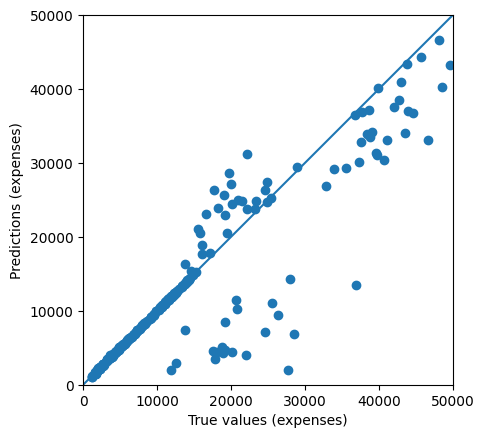

In [40]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
